## IMDB Movie Review Sentiment - CNN
Sentiment analysis is one the most common applications of natural language processing in AI.  Sentiment analysis has become an extremely  important customer service tool these days. Here we will train a sentiment classifier of movie reviews from the IMDB data set using a Convolutional Neural Networ (CNN).  We will use a Keras/TensorFlow one-dimensional CNN implementation in our CNN layers.  The dataset includes 25,000 training and 25,000 test samples.  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from keras.datasets import imdb
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# set random seed
seed = 7
np.random.seed(seed)

In [3]:
# load the IMDB dataset
vocab = 50000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab)
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [4]:
# review basic dataset properies
print("The shape of X:", X.shape)
print("The shape of y:", y.shape)
print("Classes:", np.unique(y))

The shape of X: (50000,)
The shape of y: (50000,)
Classes: [0 1]


In [5]:
# review IMDB data elements
print(X[1])
print("--------------------------------")
print(y[1])
print("=========================================================")
print(X[35000])
print("--------------------------------")
print(y[35000])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 36893, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 46151, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
--------------------------------
0
[1, 670, 5304, 5622, 13500, 308, 8551, 23033, 25, 71, 1017, 6, 253, 22, 4, 436, 223, 100, 358, 134, 5, 85

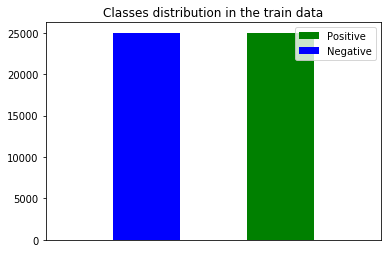

In [6]:
# check class balance
plt.hist([i for i in y if i == 1],
         bins=2, color='green', label='Positive')
plt.hist([j for j in y if j ==0],
         bins=2, color='blue', label='Negative')
plt.title('Classes distribution in the train data')
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

In [7]:
# summarize the review data
nb_words = len(np.unique(np.hstack(X)))
print("Number of words:", nb_words)
result = [len(x) for x in X]
print("Review mean length %.2f, standard deviation (%f)" % (np.mean(result), np.std(result)))

Number of words: 49998
Review mean length 234.76, standard deviation (172.911495)


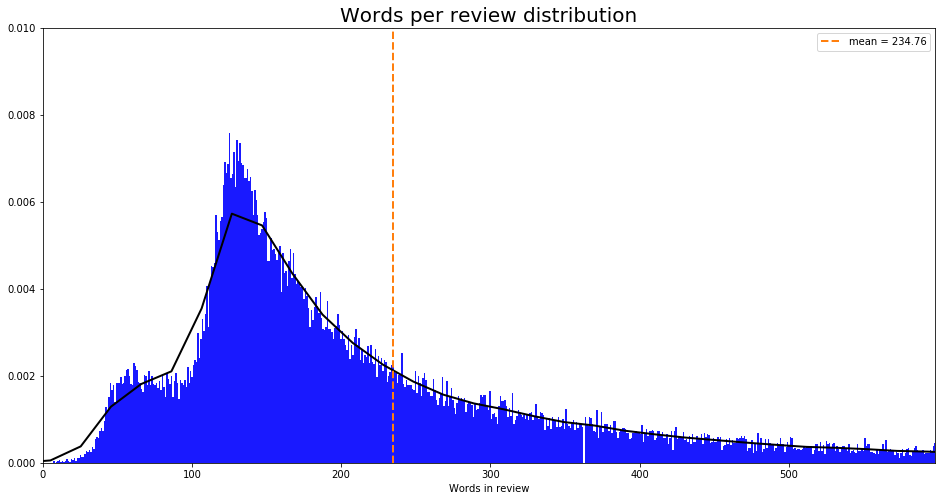

In [8]:
# plot review data
mean = np.mean(result)
num_bins = max(result)
fig, ax = plt.subplots(figsize=(16,8))
sb.distplot(result, bins=num_bins,
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 2})
ax.set_xlim(left=0, right=np.percentile(result, 95))
ax.set_xlabel('Words in review')
ymax = 0.010
plt.ylim(0, ymax)
ax.plot([mean, mean], [0, ymax], '--', label=f'mean = {mean:.2f}', linewidth=2)
ax.set_title('Words per review distribution', fontsize=20)
plt.legend()
plt.show()

In [9]:
# set max review length and pad the shorter sequences
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [10]:
# define the CNN model
def cnn_model(vocab, word_vector_dim, kernel_size, max_words):
    model = Sequential()
    model.add(Embedding(vocab, word_vector_dim, input_length=max_words))
    model.add(Conv1D(filters=word_vector_dim, kernel_size=kernel_size, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model    

In [11]:
# create the model
word_vector_dim = 64
kernel_size = 3
model = cnn_model(vocab, word_vector_dim, kernel_size, max_words)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           3200000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 64)           12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 7,212,853
Trainable params: 7,212,853
Non-trainable params: 0
_________________________________________________________________


In [12]:
# fit the model
batch_size = 128
nb_epochs = 20
history = model.fit(X_train, y_train, epochs=nb_epochs, batch_size=batch_size, validation_data=(X_test, y_test)).history

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 55s 2ms/step - loss: 0.4707 - acc: 0.7458 - val_loss: 0.2762 - val_acc: 0.8851
Epoch 2/20
25000/25000 [==============================] - 57s 2ms/step - loss: 0.1604 - acc: 0.9404 - val_loss: 0.2917 - val_acc: 0.8823
Epoch 3/20
25000/25000 [==============================] - 58s 2ms/step - loss: 0.0648 - acc: 0.9794 - val_loss: 0.3982 - val_acc: 0.8713
Epoch 4/20
25000/25000 [==============================] - 51s 2ms/step - loss: 0.0235 - acc: 0.9949 - val_loss: 0.5119 - val_acc: 0.8662
Epoch 5/20
25000/25000 [==============================] - 49s 2ms/step - loss: 0.0097 - acc: 0.9985 - val_loss: 0.6202 - val_acc: 0.8649
Epoch 6/20
25000/25000 [==============================] - 55s 2ms/step - loss: 0.0051 - acc: 0.9991 - val_loss: 0.6860 - val_acc: 0.8632
Epoch 7/20
25000/25000 [==============================] - 52s 2ms/step - loss: 0.0019 - acc: 0.9998 - val_loss: 0.8119 - val_acc

In [14]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

25000/25000 [==============================] - 15s 609us/step
Accuracy: 86.36%


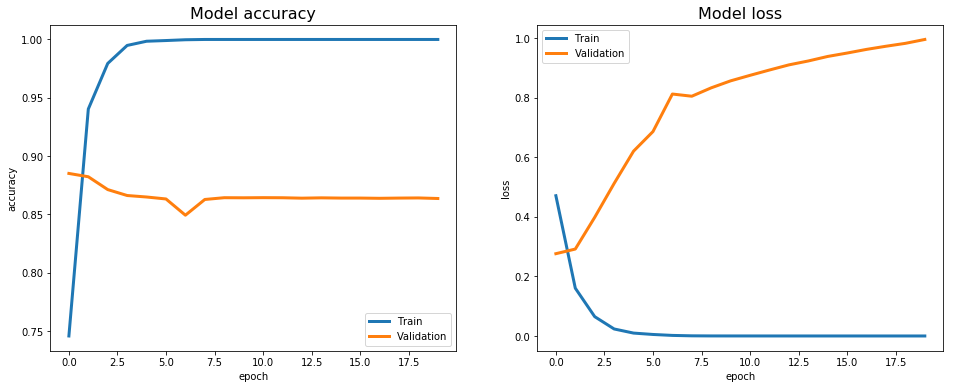

In [15]:
# plot the model loss and accuracy
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history['acc'], label='Train', linewidth=3)
axis1.plot(history['val_acc'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='lower right')

# summarize history for loss
axis2.plot(history['loss'], label='Train', linewidth=3)
axis2.plot(history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper left')
plt.show()

In [16]:
# define the confusion matrix
def plot_confusion_matrix(y_true, y_pred, ax, class_names, vmax=None,
                          normed=True, title='Confusion matrix'):
    matrix = confusion_matrix(y_true,y_pred)
    if normed:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    sb.heatmap(matrix, vmax=vmax, annot=True, square=True, ax=ax,
               cmap=plt.cm.Blues_r, cbar=False, linecolor='black',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, fontsize=16)
    #ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

In [17]:
# predict class outputs
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

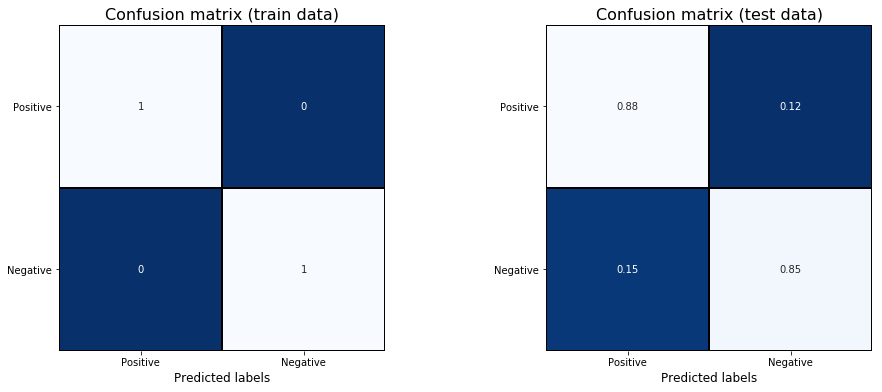

In [18]:
# plot the confusion matrix
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
plot_confusion_matrix(y_train, y_train_pred, ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])
plot_confusion_matrix(y_test, y_test_pred, ax=axis2,
                      title='Confusion matrix (test data)',
                      class_names=['Positive', 'Negative'])
plt.show()